# Jupyter Workflow
> The classic Jake Vanderplas' Jupyter workflow revisited using nbdev

In [ ]:
#| default_exp data

In [ ]:
#| export
from pathlib import Path
from urllib.request import urlretrieve

import pandas as pd

In [ ]:
#| export
FREMONT_URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [ ]:
#| export
def get_fremont_data(url:str=FREMONT_URL,  # Web location of the data (optional)
                     filename:str='Fremont.csv', # Location to save the data (optional)
                     force_download:bool=False # if True, force redownload of data (optional)
                    ) -> pd.DataFrame: # The fremont bridge data
    if force_download or not Path(filename).exists():
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col='Date')
    
    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)
        
    data.columns = ['Total', 'East', 'West']
    return data

## Test `get_fremont_data`

In [ ]:
import numpy as np

In [ ]:
data = get_fremont_data()

In [ ]:
assert all(data.columns == ["Total", "East", "West"])
assert isinstance(data.index, pd.DatetimeIndex)
assert len(np.unique(data.index.time)) == 24

## Data Analysis

In [ ]:
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn')

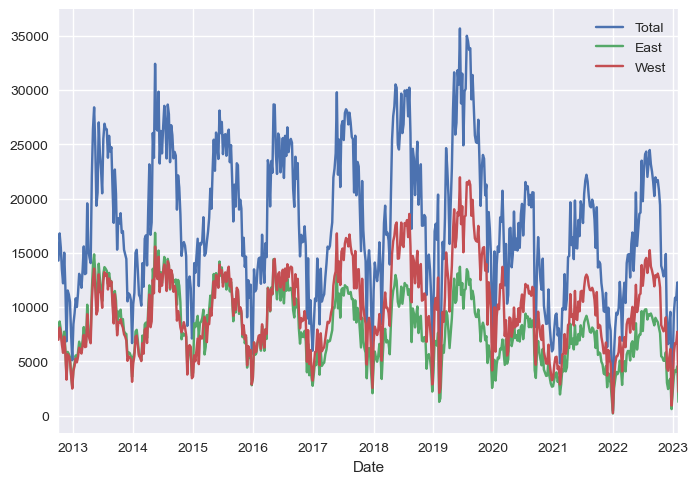

In [ ]:
data.resample('W').sum().plot();

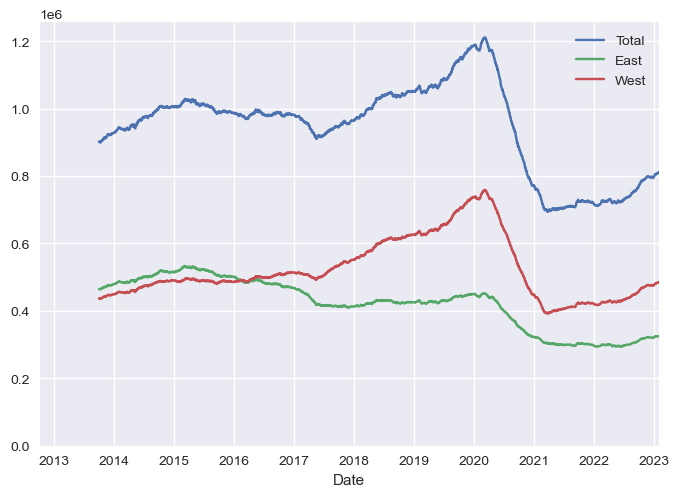

In [ ]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

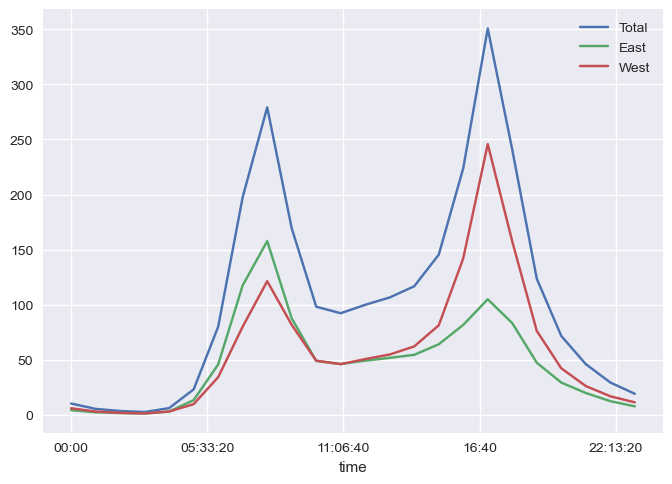

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


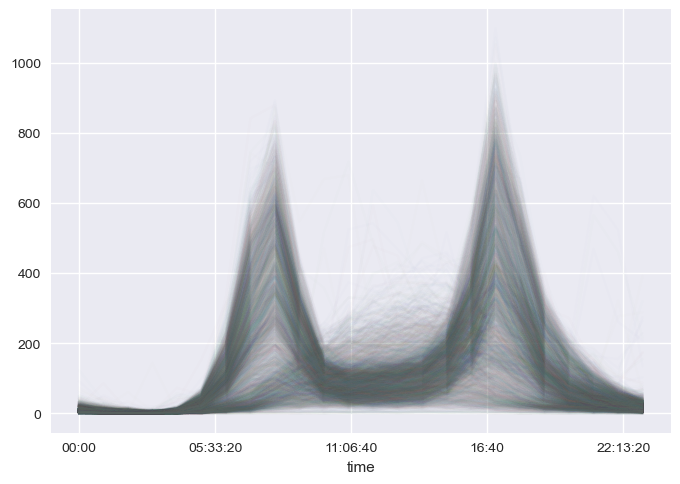

In [ ]:
pivoted.plot(legend=False, alpha=0.01);

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()